In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

#  Assignment 1 - Advance Machine Learning 159.738 

---

### Team members:
Ziyi Wang ID 18042783
Youzhi Lei   19039281

## Content
* Loading datasets and resize data split to training and testing
* For this part, we will use the CNN for the dog&cat dataset


---


#### Information about datasets
#### Labeled dogs and cats from Microsoft
* Dogs and Cats image https://www.microsoft.com/en-us/download/details.aspx?id=54765

In [2]:
#!pip install opencv-python

In [3]:
#!pip install tensorflow

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
import patsy
import os
from PIL import Image 
import cv2
%matplotlib inline

In [5]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.10.0


In [3]:
from pylab import rcParams

sns.set(style="ticks")
#sns.set_style("whitegrid")
rcParams['figure.dpi'] = 150
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['patch.edgecolor'] = 'white'
rcParams['font.family'] = 'StixGeneral'
rcParams['figure.figsize'] = 10,8
rcParams['font.size'] = 14
rcParams['axes.labelsize'] = 'large'
rcParams['xtick.labelsize'] = 14
rcParams['ytick.labelsize'] = 14

pd.options.display.max_columns = 50

In [6]:
import os
cwd = os.getcwd()
print(cwd)
#Please put the data to current location, Thanks 

/home/dp1


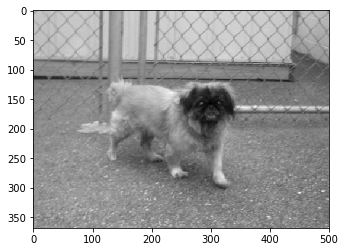

In [9]:
#load the dataset 
#test one image and show 
DATADIR = "./Documents/fred/codes/machinelearning2019/kagglecatsanddogs/PetImages"
CATEGORIES = ["Dog","Cat"]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)#path to cats or dogs dir
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)#read and make it to grey scale
        plt.imshow(img_array,cmap="gray")
        plt.show()
        break
    break
        

In [10]:
#show the print array
print(img_array)

[[180 177 176 ... 139 125 128]
 [177 178 181 ... 137 124 127]
 [179 178 176 ... 145 133 135]
 ...
 [148 153 155 ... 115 106 108]
 [148 151 153 ... 106 107 114]
 [142 146 149 ... 140 163 178]]


<function matplotlib.pyplot.show(*args, **kw)>

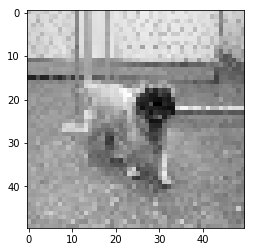

In [14]:
# set the image size to 50
IMG_SIZE = 50
new_array = cv2.resize(img_array,(IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = 'gray')
plt.show

In [15]:
import random
# seperate the dataset to training set and testing set 

training_data = []
testing_data = []


def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        #conver the dog and cat to numerical value 0/1
        class_num = CATEGORIES.index(category)
        
        for img in os.listdir(path):
            try:
                #read and make it to grey scale
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                #resize operation
                new_array = cv2.resize(img_array,(IMG_SIZE, IMG_SIZE))
                #small image and classfication name to training data
                randvalue =  random.randint(1, 2)
                if(randvalue == 1) :
                    training_data.append([new_array, class_num])
                else: 
                    testing_data.append([new_array, class_num])              
                
            except Exception as e:
                pass#pass the image if they broken
            
create_training_data()

In [16]:
# get out and show the training data and testing data
print(len(training_data))
print(len(testing_data))


12519
12427


In [40]:
#seperate dataset
random.shuffle(training_data)
random.shuffle(testing_data)

In [41]:
for sample in training_data[:10]:
    print(sample[1])

1
1
1
1
0
0
1
0
1
1


In [55]:
#featurs set
trainfeaturex = []
#label
trainlabely = []
#featurs set
testfeaturex = []
#label
testlabely = []

In [56]:
for features, label in training_data:
    trainfeaturex.append(features)
    trainlabely.append(label)
#conver numpy array in CNN network, -1 means how many featurs do we have and 1 means grey image
trainfeaturex = np.array(trainfeaturex).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [57]:
for features, label in testing_data:
    testfeaturex.append(features)
    testlabely.append(label)
#conver numpy array in CNN network, -1 means how many featurs do we have and 1 means grey image
testfeaturex = np.array(testfeaturex).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [58]:
import pickle

pickle_out = open("trainfeaturex.pickle", "wb")
pickle.dump(trainfeaturex, pickle_out)
pickle_out.close()

pickle_out = open("trainlabely.pickle", "wb")
pickle.dump(trainlabely, pickle_out)
pickle_out.close()

pickle_in = open("trainfeaturex.pickle", "rb")
trainfeaturex = pickle.load(pickle_in)

In [59]:
#pickle for testr 
pickle_out = open("testfeaturex.pickle", "wb")
pickle.dump(testfeaturex, pickle_out)
pickle_out.close()

pickle_out = open("testlabely.pickle", "wb")
pickle.dump(testlabely, pickle_out)
pickle_out.close()

#test 
pickle_in = open("testfeaturex.pickle", "rb")
testfeaturex = pickle.load(pickle_in)

In [60]:
trainfeaturex[1]

array([[[255],
        [255],
        [255],
        ...,
        [255],
        [255],
        [255]],

       [[255],
        [255],
        [255],
        ...,
        [255],
        [255],
        [255]],

       [[255],
        [255],
        [255],
        ...,
        [255],
        [255],
        [255]],

       ...,

       [[255],
        [255],
        [255],
        ...,
        [255],
        [255],
        [255]],

       [[255],
        [255],
        [255],
        ...,
        [255],
        [255],
        [255]],

       [[255],
        [255],
        [255],
        ...,
        [255],
        [255],
        [255]]], dtype=uint8)

In [61]:
trainfeaturex = trainfeaturex/255
trainfeaturex.shape

(12519, 50, 50, 1)

In [62]:
testfeaturex1 = testfeaturex/255
testfeaturex.shape

(12427, 50, 50, 1)

after above one can do CNN model training

### CNN Network

In [67]:
from keras.models import Sequential
from keras.layers import Input, Conv2D, BatchNormalization, Activation, MaxPool2D, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same', input_shape = trainfeaturex.shape[1:]))
# batchnormalization
# model.add(BatchNormalization(axis=bn_axis, name='bn_conv1'))

model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2), padding='same'))


model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(len(CATEGORIES), activation='softmax'))



In [68]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [69]:
model.fit(trainfeaturex, trainlabely, epochs=5)

Epoch 1/5
12519/12519 [==============================] - 14s 1ms/step - loss: 0.6423 - acc: 0.6259
Epoch 2/5
12519/12519 [==============================] - 14s 1ms/step - loss: 0.5718 - acc: 0.7084
Epoch 3/5
12519/12519 [==============================] - 14s 1ms/step - loss: 0.5328 - acc: 0.7332
Epoch 4/5
12519/12519 [==============================] - 14s 1ms/step - loss: 0.5101 - acc: 0.7485
Epoch 5/5
12519/12519 [==============================] - 14s 1ms/step - loss: 0.4872 - acc: 0.7660


In [70]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 50, 50, 64)        640       
_________________________________________________________________
activation_3 (Activation)    (None, 50, 50, 64)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
activation_4 (Activation)    (None, 25, 25, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 10816)             0         
__________

In [71]:
#testing_data.shape

AttributeError: 'list' object has no attribute 'shape'

In [72]:
test_loss, test_acc = model.evaluate(testfeaturex1, testlabely)

print('Test accuracy:', test_acc)

12427/12427 [==============================] - 4s 303us/step
Test accuracy: 0.7474853142471242


In [74]:
predictions = model.predict(testfeaturex1)

In [75]:
predictions[100]

array([0.9825928 , 0.01740718], dtype=float32)